
# <center>Problem 2</center>



 <center>Fubraury 17, 2019 </center>


##### Author:


**Dehgan Arthur** :    20088465  
**Sghir Hamza**   :    20147626     
**Adrien Mainka** :    20130281  



inspired from https://github.com/MaximumEntropy/welcome_tutorials/tree/pytorch/pytorch

In [77]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler


import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt

## Define image transformations & Initialize datasets


In [36]:
#Define image transformations & Initialize datasets

mnist_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=mnist_transforms, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, transform=mnist_transforms, download=True)

# DataLoaders
num_train = 48000
loader_train = DataLoader(mnist_train, batch_size=64, sampler=sampler.SubsetRandomSampler(range(num_train)))
loader_val = DataLoader(mnist_train, batch_size=64,sampler=sampler.SubsetRandomSampler(range(num_train, 60000)))
loader_test = DataLoader(mnist_test, batch_size=64)

## Data visualisation

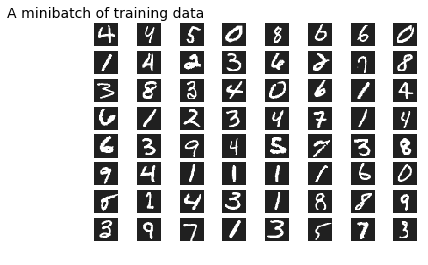

In [42]:
X, y = iter(loader_train).next()
data = X.numpy()

for i in range(8):
    for j in range(8):
        plt_idx = i * 8 + j + 1
        ax = plt.subplot(8, 8, plt_idx)
        plt.imshow(data[j+(i*8),0]+0.13087, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        if i == 0 and j == 0:
            plt.title('A minibatch of training data', size=14)
plt.show()


## CNN Classifier

In [67]:
class Classifier(nn.Module):
    """Convnet Classifier"""
    def __init__(self):
        super(Classifier, self).__init__()
        
        # Convolutional Layers
        self.conv = nn.Sequential(
            # Layer 1
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), padding=1),
            nn.ReLU(),

            # Layer 2
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),

            # Layer 3
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1),
            nn.ReLU(),

            # Layer 4
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2)
        )
        
        # Fully Connected layers
        self.fc = nn.Sequential(
            nn.Linear(7 * 7 * 128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.fc(self.conv(x).view(x.shape[0], -1))
    
    def evalute(self, data):
        
            # Evaluate
        clf.eval()  
        total = 0
        correct = 0
        for batch_idx, (inputs, targets) in enumerate(data):
            
            if cuda_available:
                inputs, targets = inputs.cuda(), targets.cuda()
                    
            inputs, targets = Variable(inputs, volatile=True), Variable(targets, volatile=True)
            outputs = clf(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            #print(total)
            #print(correct)
            #print("\n")

        return correct/total

In [68]:
cuda_available = torch.cuda.is_available()

clf = Classifier()
if cuda_available:
    clf = clf.cuda()
optimizer = torch.optim.Adam(clf.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

In [69]:
loss_f=[]
validation_acc=[]
training_acc=[]
for epoch in range(10):
    losses = []
    # Train
    for batch_idx, (inputs, targets) in enumerate(loader_train):
        if cuda_available:
            inputs, targets = inputs.cuda(), targets.cuda()

        optimizer.zero_grad()
        inputs, targets = Variable(inputs), Variable(targets)
        outputs = clf(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
    loss_f.append(np.mean(losses))
    print('Epoch : %d      Loss : %.3f ' % (epoch, np.mean(losses)))
    
    train_acc=clf.evalute(loader_train)
    val_acc=clf.evalute(loader_val)
    print('Epoch : {:5d}    train Acc : {:3.2%}     val Acc : {:3.2%}'.format(epoch, train_acc,val_acc))
    
    print('--------------------------------------------------------------')
    validation_acc.append(val_acc)
    training_acc.append(train_acc)
    clf.train()

Epoch : 0      Loss : 0.500 


C:\Users\Sghir\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch :     0    train Acc : 95.09%     val Acc : 95.34%
--------------------------------------------------------------
Epoch : 1      Loss : 0.129 
Epoch :     1    train Acc : 97.28%     val Acc : 97.04%
--------------------------------------------------------------
Epoch : 2      Loss : 0.085 
Epoch :     2    train Acc : 98.04%     val Acc : 97.63%
--------------------------------------------------------------
Epoch : 3      Loss : 0.067 
Epoch :     3    train Acc : 98.35%     val Acc : 98.00%
--------------------------------------------------------------
Epoch : 4      Loss : 0.054 
Epoch :     4    train Acc : 98.76%     val Acc : 98.22%
--------------------------------------------------------------
Epoch : 5      Loss : 0.046 
Epoch :     5    train Acc : 98.71%     val Acc : 98.32%
--------------------------------------------------------------
Epoch : 6      Loss : 0.040 
Epoch :     6    train Acc : 98.80%     val Acc : 98.18%
-------------------------------------------------

##### Parameters number

In [75]:
def count_parameters(model):
    
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

para=count_parameters(clf)
print("The numbre of learned parameters are : " +str(para))

The numbre of learned parameters are : 504042


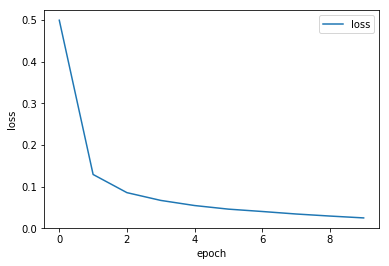

In [72]:
from matplotlib import pyplot as plt
#plt.plot(range(0, 4), validation_acc, label="Val acc")
plt.plot(range(0, 10), loss_f, label="loss")
plt.legend(title="")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

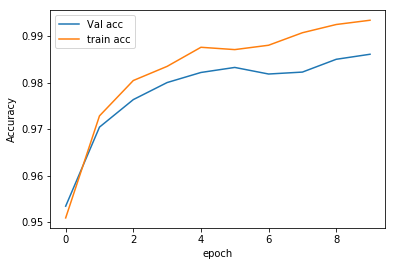

In [74]:

plt.plot(range(0, 10), validation_acc, label="Val acc")
plt.plot(range(0, 10), training_acc, label="train acc")
#plt.plot(range(0, 10), loss_f, label="loss")
plt.legend(title="")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [76]:
# Evaluate test set 

test_acc=clf.evalute(loader_test)
print("Accuracy of the model on the test set: {:3.2%}".format(test_acc))

C:\Users\Sghir\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Accuracy of the model on the test set: 98.72%


## Comparision CNN vs MLP

Convolutional Neural Networks were designed to map image data to an output variable, They have proven so effective that they are the go-to method for any type of prediction problem involving image data as an input or  for character recognition . whereas, MLP are suitable for classification prediction problems where inputs are assigned a class or label. In this project, The deep CNNs successfully performed high-level characters classification, and achieved valid classification accuracy around 98.61%, whereas the best conventional MLPs achieved 96.79% . However,  The classification accuracy improvement comes at the cost of a penalty in processor runtime.
